In [148]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
plt.style.use(['science', 'ieee', 'bright'])
# plt.style.use(['science','ieee'])
term = 'sdr'

In [149]:
result2 = torch.load('eval_results/0505_120551_Slakh_0505/results.pt')[term] # prop2 
result1 = torch.load('eval_results/0505_120648_Slakh_0505/results.pt')[term] # prop1 
result_base = torch.load('eval_results/0417_200733_Slakh_0505/results.pt') [term]# base

In [150]:
# result2 = torch.load('eval_results/0505_120845_Slakh_0505/results.pt')['sdr'] # prop2 1:4
# result1 = torch.load('eval_results/0505_120754_Slakh_0505/results.pt')['sdr'] # prop1 
# result_base = torch.load('eval_results/0417_200733_Slakh_0505/results.pt') ['sdr']# base

In [151]:
result2_mus = torch.load('eval_results/0505_221055_MUSDB_0506/results.pt')[term] # prop2 1:4
result1_mus = torch.load('eval_results/0505_220936_MUSDB_0506/results.pt')[term] # prop1 
# result_base = torch.load('eval_results/0418_221450_MUSDB_0506/results.pt') ['sdr']# base
result_base_mus = torch.load('eval_results/0418_221450_MUSDB_0509/results.pt') [term]# base

In [152]:
def build_data(data):
    data = np.array(data).T
    return list(data)

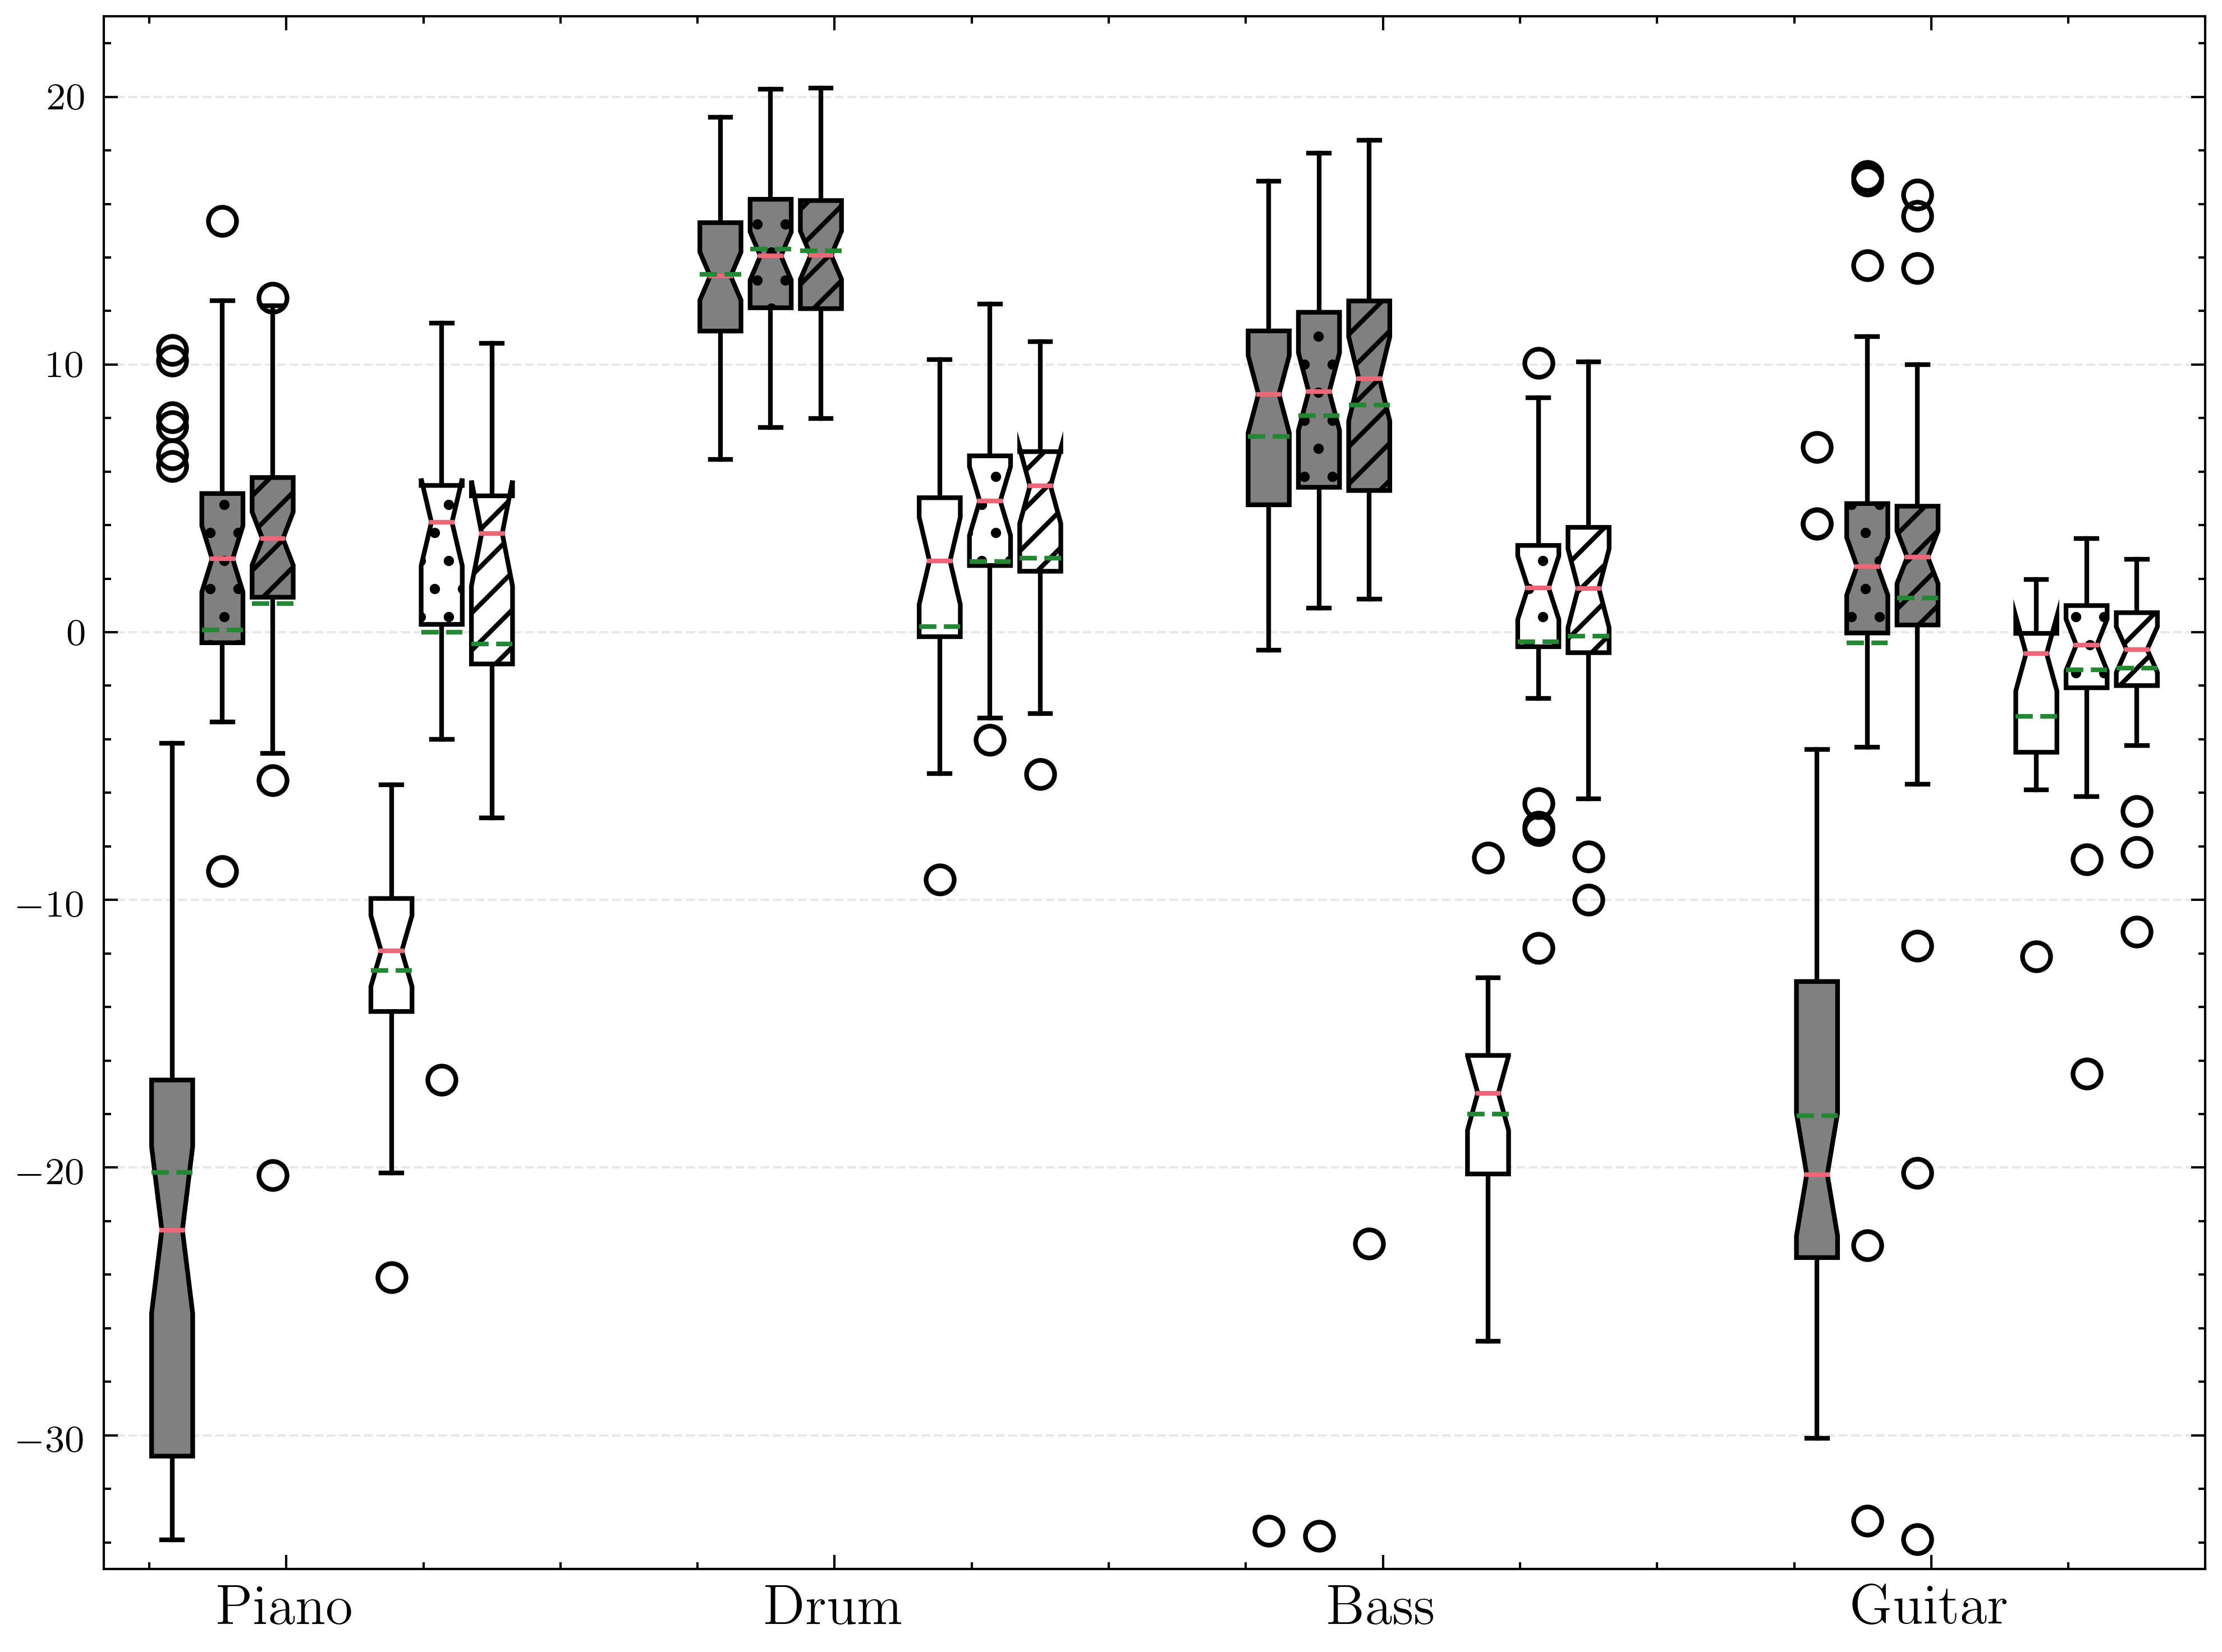

In [154]:
import matplotlib.pyplot as plt
import numpy as np
data_base = build_data(result_base)
data_1 = build_data(result1)
data_2 = build_data(result2)
data_base_m = build_data(result_base_mus)
data_1_m = build_data(result1_mus)
data_2_m = build_data(result2_mus)

ticks = ['Piano', 'Drum', 'Bass', 'Guitar']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

fig, ax = plt.subplots(figsize=(7,5))


# bp1 = plt.boxplot(data_base, positions=np.array(range(len(data_base)))*2.0-0.6, sym='', widths=0.2)
# bp4 = plt.boxplot(data_base_m, positions=np.array(range(len(data_base_m)))*2.0-0.4, sym='', widths=0.2)
# bp2 = plt.boxplot(data_1, positions=np.array(range(len(data_1)))*2.0-0.2, sym='', widths=0.2)
# bp5 = plt.boxplot(data_1_m, positions=np.array(range(len(data_1_m)))*2.0, sym='', widths=0.2)
# bp3 = plt.boxplot(data_2, positions=np.array(range(len(data_2)))*2.0+0.2, sym='', widths=0.2)
# bp6 = plt.boxplot(data_2_m, positions=np.array(range(len(data_2_m)))*2.0+0.4, sym='', widths=0.2)

# [romt]
width=0.9
# print(len(data_base))
bp1 = plt.boxplot(data_base, positions=(np.array(range(len(data_base)))+0.4)*12-5.3,\
                  sym='o', widths=width,  patch_artist=True,   showfliers=True, showmeans=True, meanline=True, notch=True)
bp2 = plt.boxplot(data_1, positions=(np.array(range(len(data_base)))+0.4)*12-4.2,\
                  sym='o', widths=width,  patch_artist=True,   showfliers=True, showmeans=True, meanline=True, notch=True)
bp3 = plt.boxplot(data_2, positions=(np.array(range(len(data_base)))+0.4)*12 - 3.1,\
                  sym='o', widths=width,  patch_artist=True,   showfliers=True, showmeans=True, meanline=True, notch=True)

bp4 = plt.boxplot(data_base_m, positions=(np.array(range(len(data_base)))+0.4)*12-0.5 ,\
                  sym='o', widths=width,  patch_artist=True,   showfliers=True, showmeans=True, meanline=True, notch=True)
bp5 = plt.boxplot(data_1_m, positions=(np.array(range(len(data_base)))+0.4)*12+0.6,\
                  sym='o', widths=width,  patch_artist=True,   showfliers=True, showmeans=True, meanline=True, notch=True)
bp6 = plt.boxplot(data_2_m, positions=(np.array(range(len(data_base)))+0.4)*12+1.7,\
                  sym='o', widths=width,  patch_artist=True,   showfliers=True, showmeans=True, meanline=True, notch=True)

# set_box_color(bp1, 'grey') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, 'grey') # colors are from http://colorbrewer2.org/
# set_box_color(bp3, 'grey')

# set_box_color(bp4, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp5, 'green') # colors are from http://colorbrewer2.org/
# set_box_color(bp6, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
# plt.plot([], c='#D7191C', label='Baseline')
# plt.plot([], c='green', label='Model I')
# plt.plot([], c='#2C7BB6', label='Model II')
# plt.plot([], c='#D7191C', label='Baseline')
# plt.plot([], c='green', label='Model I')
# plt.plot([], c='#2C7BB6', label='Model II')
# plt.legend()
for patch in bp1['boxes']:
#     patch.set_facecolor('#656565')
    patch.set_facecolor('grey')
for patch in bp2['boxes']:
    patch.set_facecolor('grey')
for patch in bp3['boxes']:
    patch.set_facecolor('grey')
for patch in bp4['boxes']:
    patch.set_facecolor('#ffffff')
for patch in bp5['boxes']:
    patch.set_facecolor('#ffffff')
for patch in bp6['boxes']:
    patch.set_facecolor('#ffffff')
    
    
    
#for box in bp1['boxes']:
#    box.set(hatch = '//')
# for box in bp3['boxes']:
#     box.set(hatch = )
for box in bp2['boxes']:
    box.set(hatch = '..')
for box in bp3['boxes']:
    box.set(hatch = '///')

# for box in bp3['boxes']:
#     box.set(hatch = '*')
for box in bp5['boxes']:
    box.set(hatch = '..')
for box in bp6['boxes']:
    box.set(hatch = '///')
#for box in bp6['boxes']:
#    box.set(hatch = '--')
    
    
    
    
# plt.legend([bp1["boxes"][0],bp2["boxes"][0],bp3["boxes"][0],bp4["boxes"][0],bp5["boxes"][0],bp6["boxes"][0]], 
#            ['Baseline - Slakh', 'Model I - Slakh','Model II - Slakh','Baseline - MUSDB',
#             'Model I - MUSDB','Model II - MUSDB'], 
#            loc='lower center', fontsize=12, frameon=True)
# #            bbox_to_anchor=(1.3, 0.5), loc='center right')

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
# plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xticks(range(2, 43, 12), ticks, fontsize=12)
plt.xlim(-2, 44)
plt.ylim(-35, 23)
# plt.tight_layout()
plt.savefig('boxcompare_{}.pdf'.format(term))

In [196]:
result2 = torch.load('eval_results/0505_120551_Slakh_0505/results.pt')['scores'][0] # prop2 
result1 = torch.load('eval_results/0505_120648_Slakh_0510/results.pt')['scores'] # prop1 
result_base = torch.load('eval_results/0417_200733_Slakh_0505/results.pt') ['scores'][0]# base

In [156]:
result2 = torch.load('eval_results/0505_120551_Slakh_0505/results.pt')['scores'][0] # prop2 
result1 = torch.load('eval_results/0505_120648_Slakh_0505/results.pt')['scores'][0] # prop1 
result_base = torch.load('eval_results/0417_200733_Slakh_0505/results.pt') ['scores'][0]# base

In [184]:
result2_mus = torch.load('eval_results/0505_221055_MUSDB_0506/results.pt')['scores'][0] # prop2 1:4
result1_mus = torch.load('eval_results/0505_220936_MUSDB_0506/results.pt')['scores'][0] # prop1 
# result_base = torch.load('eval_results/0418_221450_MUSDB_0506/results.pt') ['sdr']# base
result_base_mus = torch.load('eval_results/0418_221450_MUSDB_0509/results.pt')['scores'] # base

In [157]:
result1_mus = torch.load('eval_results/0505_220936_MUSDB_0506/results.pt')['scores'] # prop1 

In [199]:
data2 = list(np.mean(np.array(result2).reshape(-1, 15), 0))
data1 = np.mean(np.array(result1).reshape(-1, 15), 0)
data_base = np.mean(np.array(result_base).reshape(-1, 15), 0)

/media/sdb1/hy17/venv/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


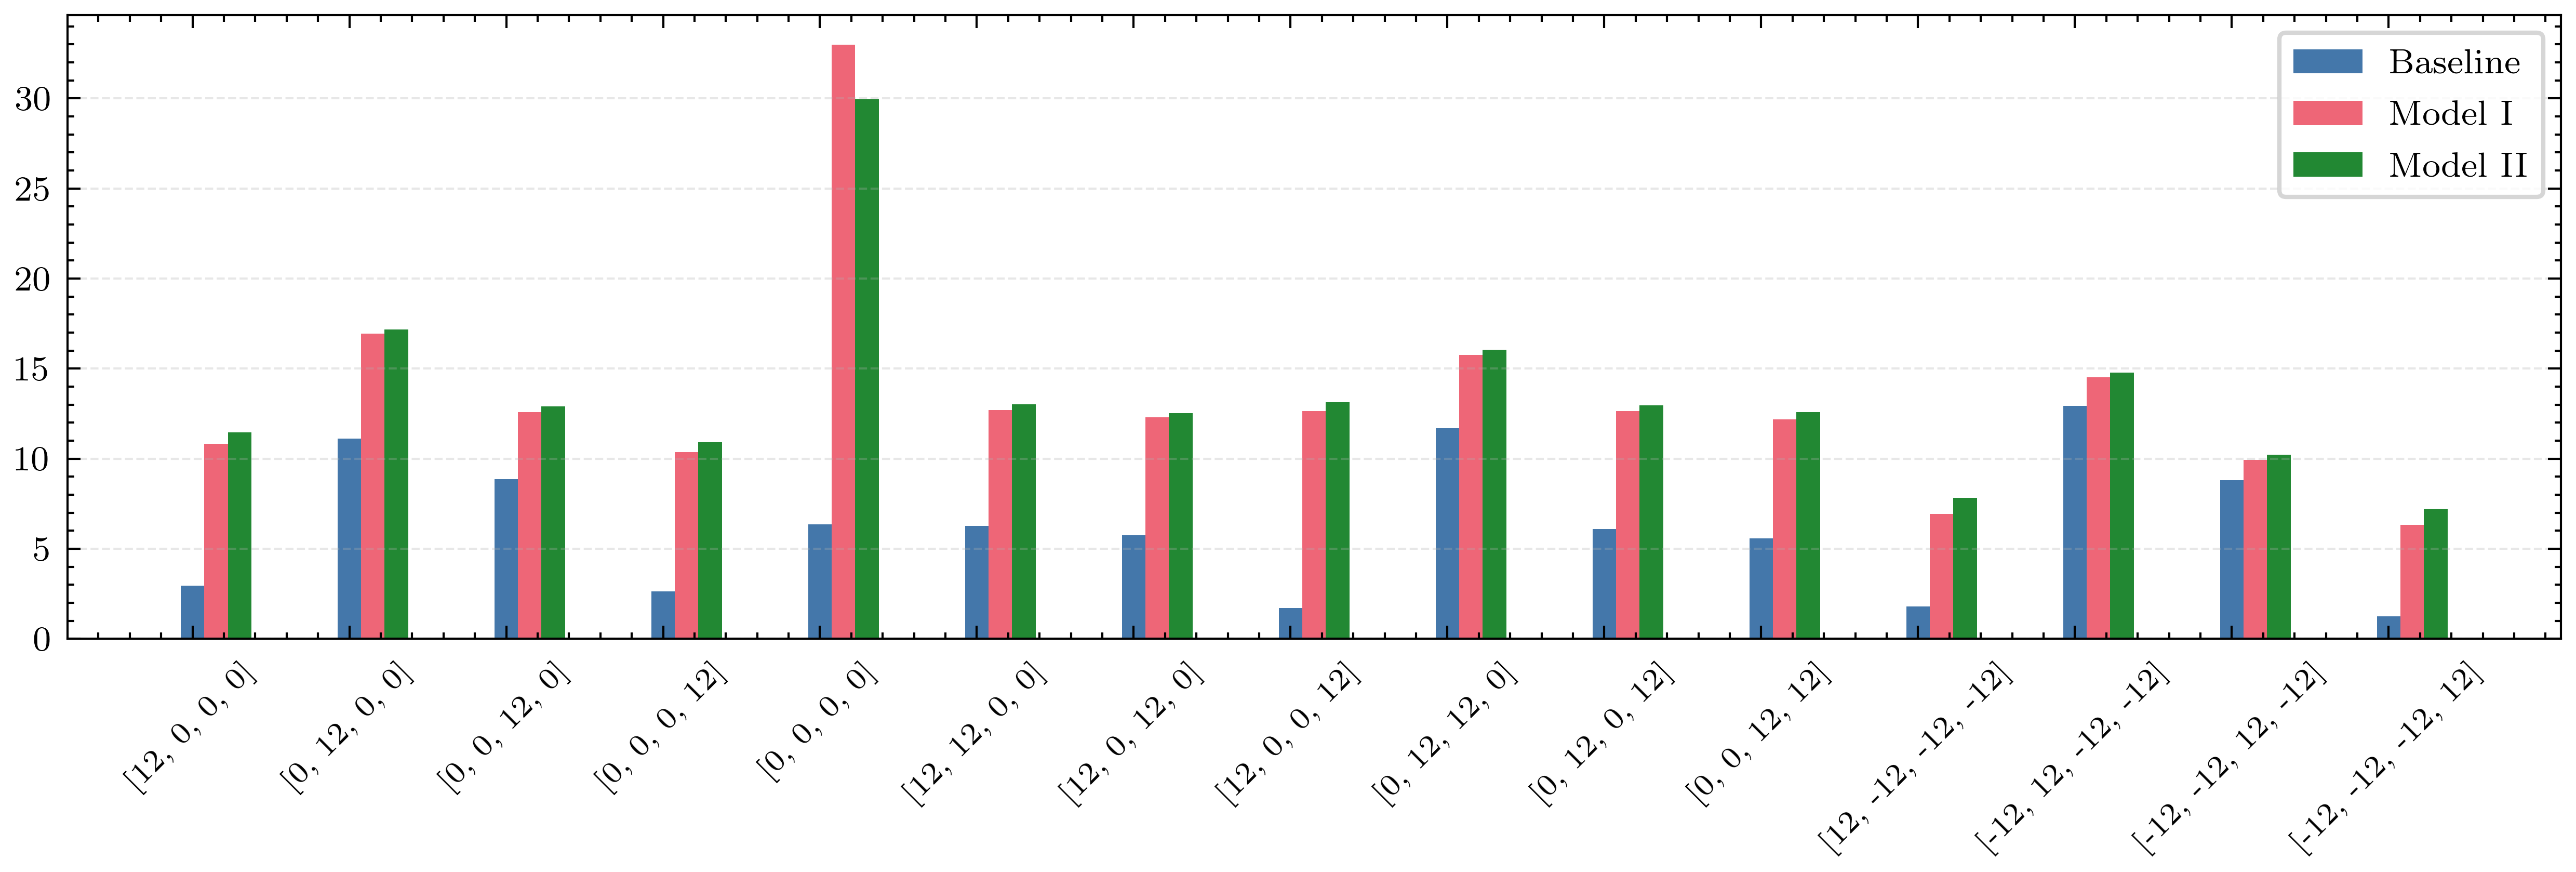

In [200]:
import numpy as np
import matplotlib.pyplot as plt

# f = plt.figure()


X = np.array(range(15))
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(2)
ax = fig.add_axes([0,0,1,1])

labels = [
[12, 0,0,0],
[0, 12,0,0],
[0, 0,12,0],
[0, 0,0,12],
[0, 0,0,0],
[12, 12, 0, 0], 
[12, 0, 12, 0],  
[12, 0, 0, 12], 
[0, 12, 12, 0], 
[0, 12, 0, 12],  
[0, 0, 12, 12], 
[12, -12,-12,-12],
[-12, 12,-12,-12],
[-12, -12,12,-12],
[-12, -12,-12,12]]

ax.bar(X + 0.00, data_base,  width = 0.15, label = 'Baseline')
ax.bar(X + 0.15, data1,  width = 0.15, label='Model I')
ax.bar(X + 0.30, data2,  width = 0.15, label='Model II')

plt.xticks(np.array(range(15)),labels, fontsize=7, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.legend(frameon=True)
plt.savefig('ratios.pdf')